In [1]:
# importing basic packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# changing the working directory

os.chdir("C:\\Users\\HP\\Desktop\\Udacity\\capstone\\house_prices")

In [3]:
# loading the dataset

data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# summary statistics for the numeric columns

data.describe()

C:\Users\HP\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# dropping the unecessary 'Id' column

data = data.drop(['Id'], axis=1)

In [6]:
# checking for missing values in the data

data.isnull().sum()[data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# taking a subset of the categorical features

cat_cols = data.select_dtypes(include=['object'])
cat_cols.shape

(1460, 43)

In [8]:
# taking a subset of the numeric features

num_cols = data.select_dtypes(include=['int64','float64'])
num_cols.shape

(1460, 37)

In [9]:
print "Missing Values in Categorical Features"
print cat_cols.isnull().sum()[cat_cols.isnull().sum()>0]

Missing Values in Categorical Features
Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [10]:
print "Missing Values in Numeric Features"
print num_cols.isnull().sum()[num_cols.isnull().sum()>0]

Missing Values in Numeric Features
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


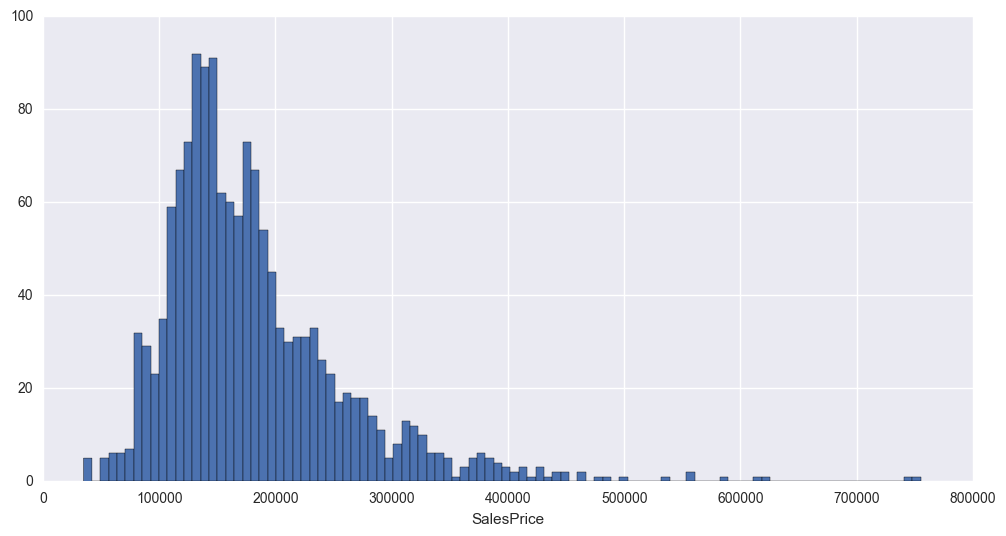

In [11]:
# plotting histogram of the target variable

plt.figure(figsize=(12,6))
plt.hist(data['SalePrice'], bins=100)
plt.xlabel('SalesPrice')
plt.show()

In [12]:
# calculating the skewness in the numeric features
# applying log-transformation on the highly skewed (skewness>0.8) features

from scipy.stats import skew
num_cols_index = data.select_dtypes(include=['int64','float64']).columns
skewed_cols = data[num_cols_index].apply(lambda x: skew(x.dropna()))
skewed_cols = skewed_cols[skewed_cols>0.8]
skewed_cols_index = skewed_cols.index
data[skewed_cols_index] = np.log1p(data[skewed_cols_index])

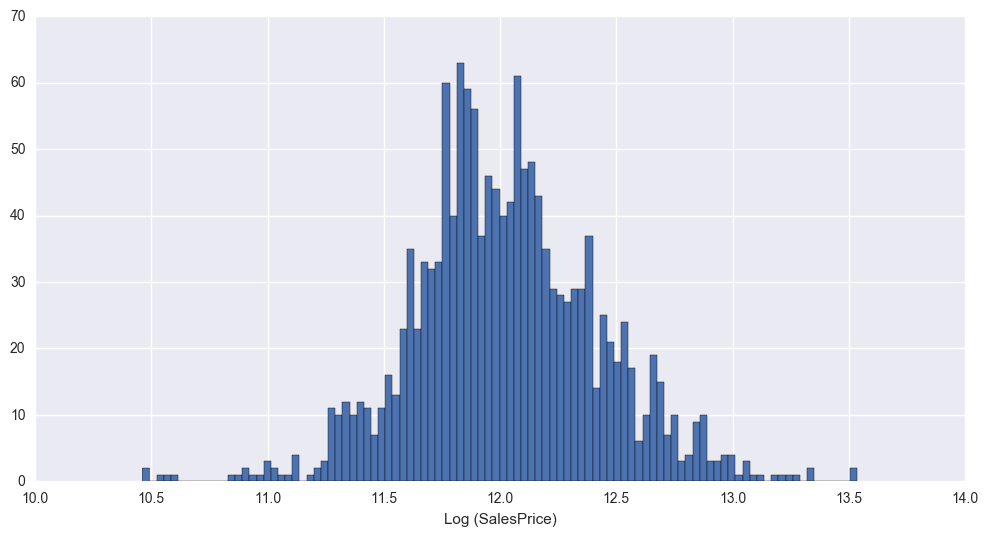

In [13]:
# plotting histogram of the target variable

plt.figure(figsize=(12,6))
plt.hist(data['SalePrice'], bins=100)
plt.xlabel('Log (SalesPrice)')
plt.show()

In [14]:
# function for imputing the missing values in the categorical features with the mode values

from scipy.stats import mode
def imputing_categorical_columns(df):
    columnsToEncode = list(df.select_dtypes(include=['object']))
    for feature in columnsToEncode:
        df[feature].fillna(mode(data[feature]).mode[0],inplace=True)

In [16]:
# imputing the categorical features with the most frequently occuring (mode) values

imputing_categorical_columns(data)

In [17]:
# checking for missing values after imputing the categorical features

data.isnull().sum()[data.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [18]:
# function for encoding the categorical features

from sklearn.preprocessing import LabelEncoder
def encoding_categorical_values(df):
        columnsToEncode = list(df.select_dtypes(include=['object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df.head()

In [19]:
# encoding the categorical features in the data

encoding_categorical_values(data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.110874,3,4.189655,9.042040,1,0,3,3,0,4,...,0.0,2,2,2,0.0,2,2008,8,4,12.247699
1,3.044522,3,4.394449,9.169623,1,0,3,3,0,2,...,0.0,2,2,2,0.0,5,2007,8,4,12.109016
2,4.110874,3,4.234107,9.328212,1,0,0,3,0,4,...,0.0,2,2,2,0.0,9,2008,8,4,12.317171
3,4.262680,3,4.110874,9.164401,1,0,0,3,0,0,...,0.0,2,2,2,0.0,2,2006,8,0,11.849405
4,4.110874,3,4.442651,9.565284,1,0,0,3,0,2,...,0.0,2,2,2,0.0,12,2008,8,4,12.429220


In [20]:
# imputing the missing values in the numeric features with the column mean

data = data.fillna(data.mean())

In [21]:
# checking for the presence of any leftover missing values

data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

In [22]:
# checking the summary statistics of the target variable

print data['SalePrice'].describe()
print "mode    ",data['SalePrice'].mode()[0]

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64
mode     11.8494048444


In [23]:
# calculating the correlations between the numeric features

corr = data[num_cols.columns].corr(method='pearson')
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.392223,-0.378062,0.078346,-0.039820,-0.002896,0.039769,0.013395,-0.092035,-0.085838,...,0.040092,0.028998,0.013820,-0.035954,-0.019569,0.025239,-0.028008,0.010286,-0.027520,-0.020279
LotFrontage,-0.392223,1.000000,0.646757,0.207340,-0.033231,0.085230,0.061083,0.114949,0.061908,0.032854,...,0.057052,0.132994,-0.019167,0.055061,0.044815,0.120014,0.025451,0.020718,0.003365,0.344441
LotArea,-0.378062,0.646757,1.000000,0.178220,-0.006308,0.021943,0.027672,0.070586,0.096966,0.084312,...,0.122915,0.137754,-0.015186,0.055375,0.087518,0.097257,0.080298,0.010518,-0.027164,0.399923
OverallQual,0.078346,0.207340,0.178220,1.000000,-0.091932,0.572323,0.550684,0.413760,0.054199,-0.101469,...,0.283256,0.445101,-0.158648,0.027546,0.049983,0.072651,-0.085131,0.070815,-0.027347,0.817185
OverallCond,-0.039820,-0.033231,-0.006308,-0.091932,1.000000,-0.375983,0.073741,-0.157388,0.045200,0.077992,...,-0.039085,-0.100783,0.092471,0.038835,0.061548,-0.008085,0.079251,-0.003511,0.043950,-0.036868
YearBuilt,-0.002896,0.085230,0.021943,0.572323,-0.375983,1.000000,0.592855,0.412414,0.151209,-0.068793,...,0.307474,0.389065,-0.446694,0.028977,-0.059629,0.005805,-0.077819,0.012398,-0.013618,0.586570
YearRemodAdd,0.039769,0.061083,0.027672,0.550684,0.073741,0.592855,1.000000,0.224582,0.012105,-0.102425,...,0.285773,0.382743,-0.226996,0.052398,-0.039983,0.009025,-0.074574,0.021490,0.035743,0.565608
MasVnrArea,0.013395,0.114949,0.070586,0.413760,-0.157388,0.412414,0.224582,1.000000,0.187073,-0.063038,...,0.161553,0.209857,-0.186104,0.047053,0.037424,0.005363,-0.054456,0.019220,-0.002091,0.417418
BsmtFinSF1,-0.092035,0.061908,0.096966,0.054199,0.045200,0.151209,0.012105,0.187073,1.000000,0.185051,...,0.082144,0.015075,-0.127733,0.051775,0.073392,0.042147,0.018808,-0.027153,0.033702,0.208099
BsmtFinSF2,-0.085838,0.032854,0.084312,-0.101469,0.077992,-0.068793,-0.102425,-0.063038,0.185051,1.000000,...,0.059134,-0.077644,0.038587,-0.022537,0.063879,0.068055,0.027978,-0.022430,0.029337,-0.030361


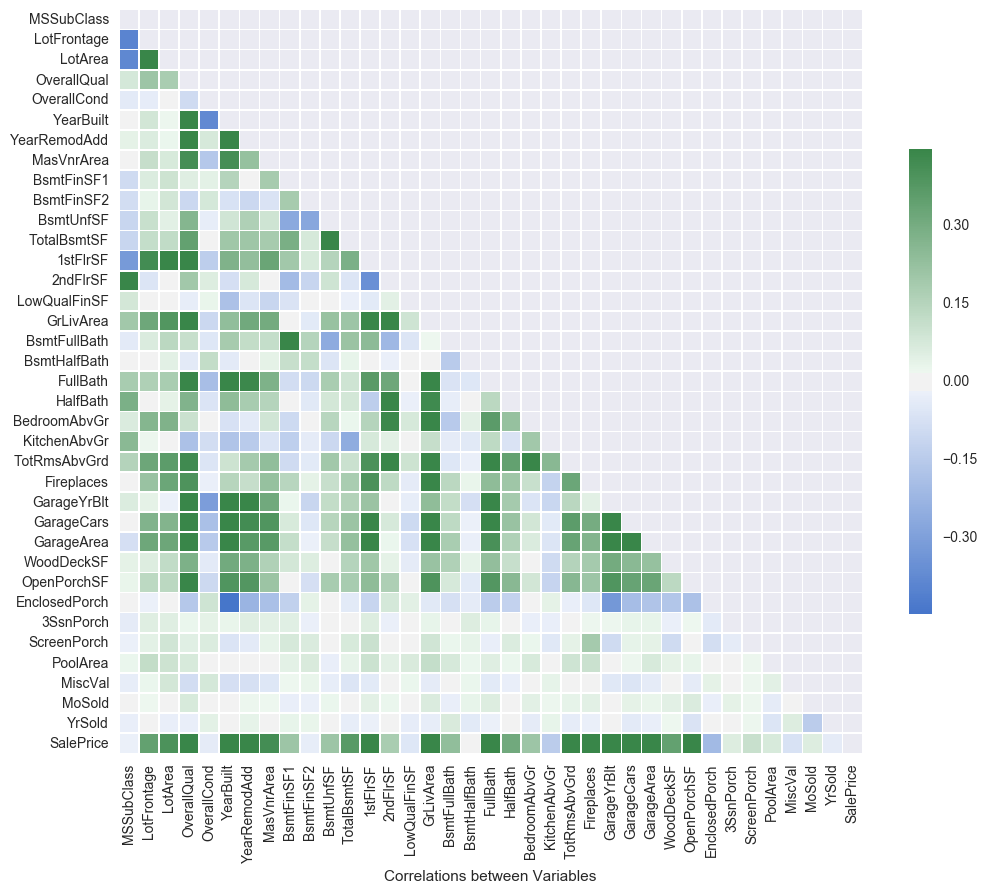

In [24]:
# creating the heatmap of the correlations between the numeric features

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))

cmap = sns.diverging_palette(255,133,as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.xlabel('Correlations between Variables')
plt.show()

In [25]:
# getting the correlations of the various features with the target variable

corr_with_target = corr['SalePrice'].to_dict()
del corr_with_target['SalePrice']
for z in sorted(corr_with_target.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*z))

OverallQual: 	0.817184614487
GrLivArea: 	0.730253765163
GarageCars: 	0.680624872658
GarageArea: 	0.650887681144
1stFlrSF: 	0.608955042048
FullBath: 	0.594770664997
YearBuilt: 	0.58657019279
YearRemodAdd: 	0.565607781462
TotRmsAbvGrd: 	0.534422400209
GarageYrBlt: 	0.500449075712
Fireplaces: 	0.489449545157
OpenPorchSF: 	0.459947910147
MasVnrArea: 	0.417418113208
LotArea: 	0.399923183072
TotalBsmtSF: 	0.372837700459
LotFrontage: 	0.344440773978
WoodDeckSF: 	0.34303865145
HalfBath: 	0.313982224257
BsmtFullBath: 	0.236224160849
BedroomAbvGr: 	0.209043433026
BsmtUnfSF: 	0.208233080372
BsmtFinSF1: 	0.208098735044
EnclosedPorch: 	-0.207263174015
2ndFlrSF: 	0.180777914033
KitchenAbvGr: 	-0.144278001612
ScreenPorch: 	0.105857477441
PoolArea: 	0.069948851822
MiscVal: 	-0.0670535803323
3SsnPorch: 	0.0588269315632
MoSold: 	0.0573295044662
LowQualFinSF: 	-0.0545133258719
YrSold: 	-0.0372629101202
OverallCond: 	-0.0368684538348
BsmtFinSF2: 	-0.0303606907041
MSSubClass: 	-0.0202790193433
BsmtHalfBath

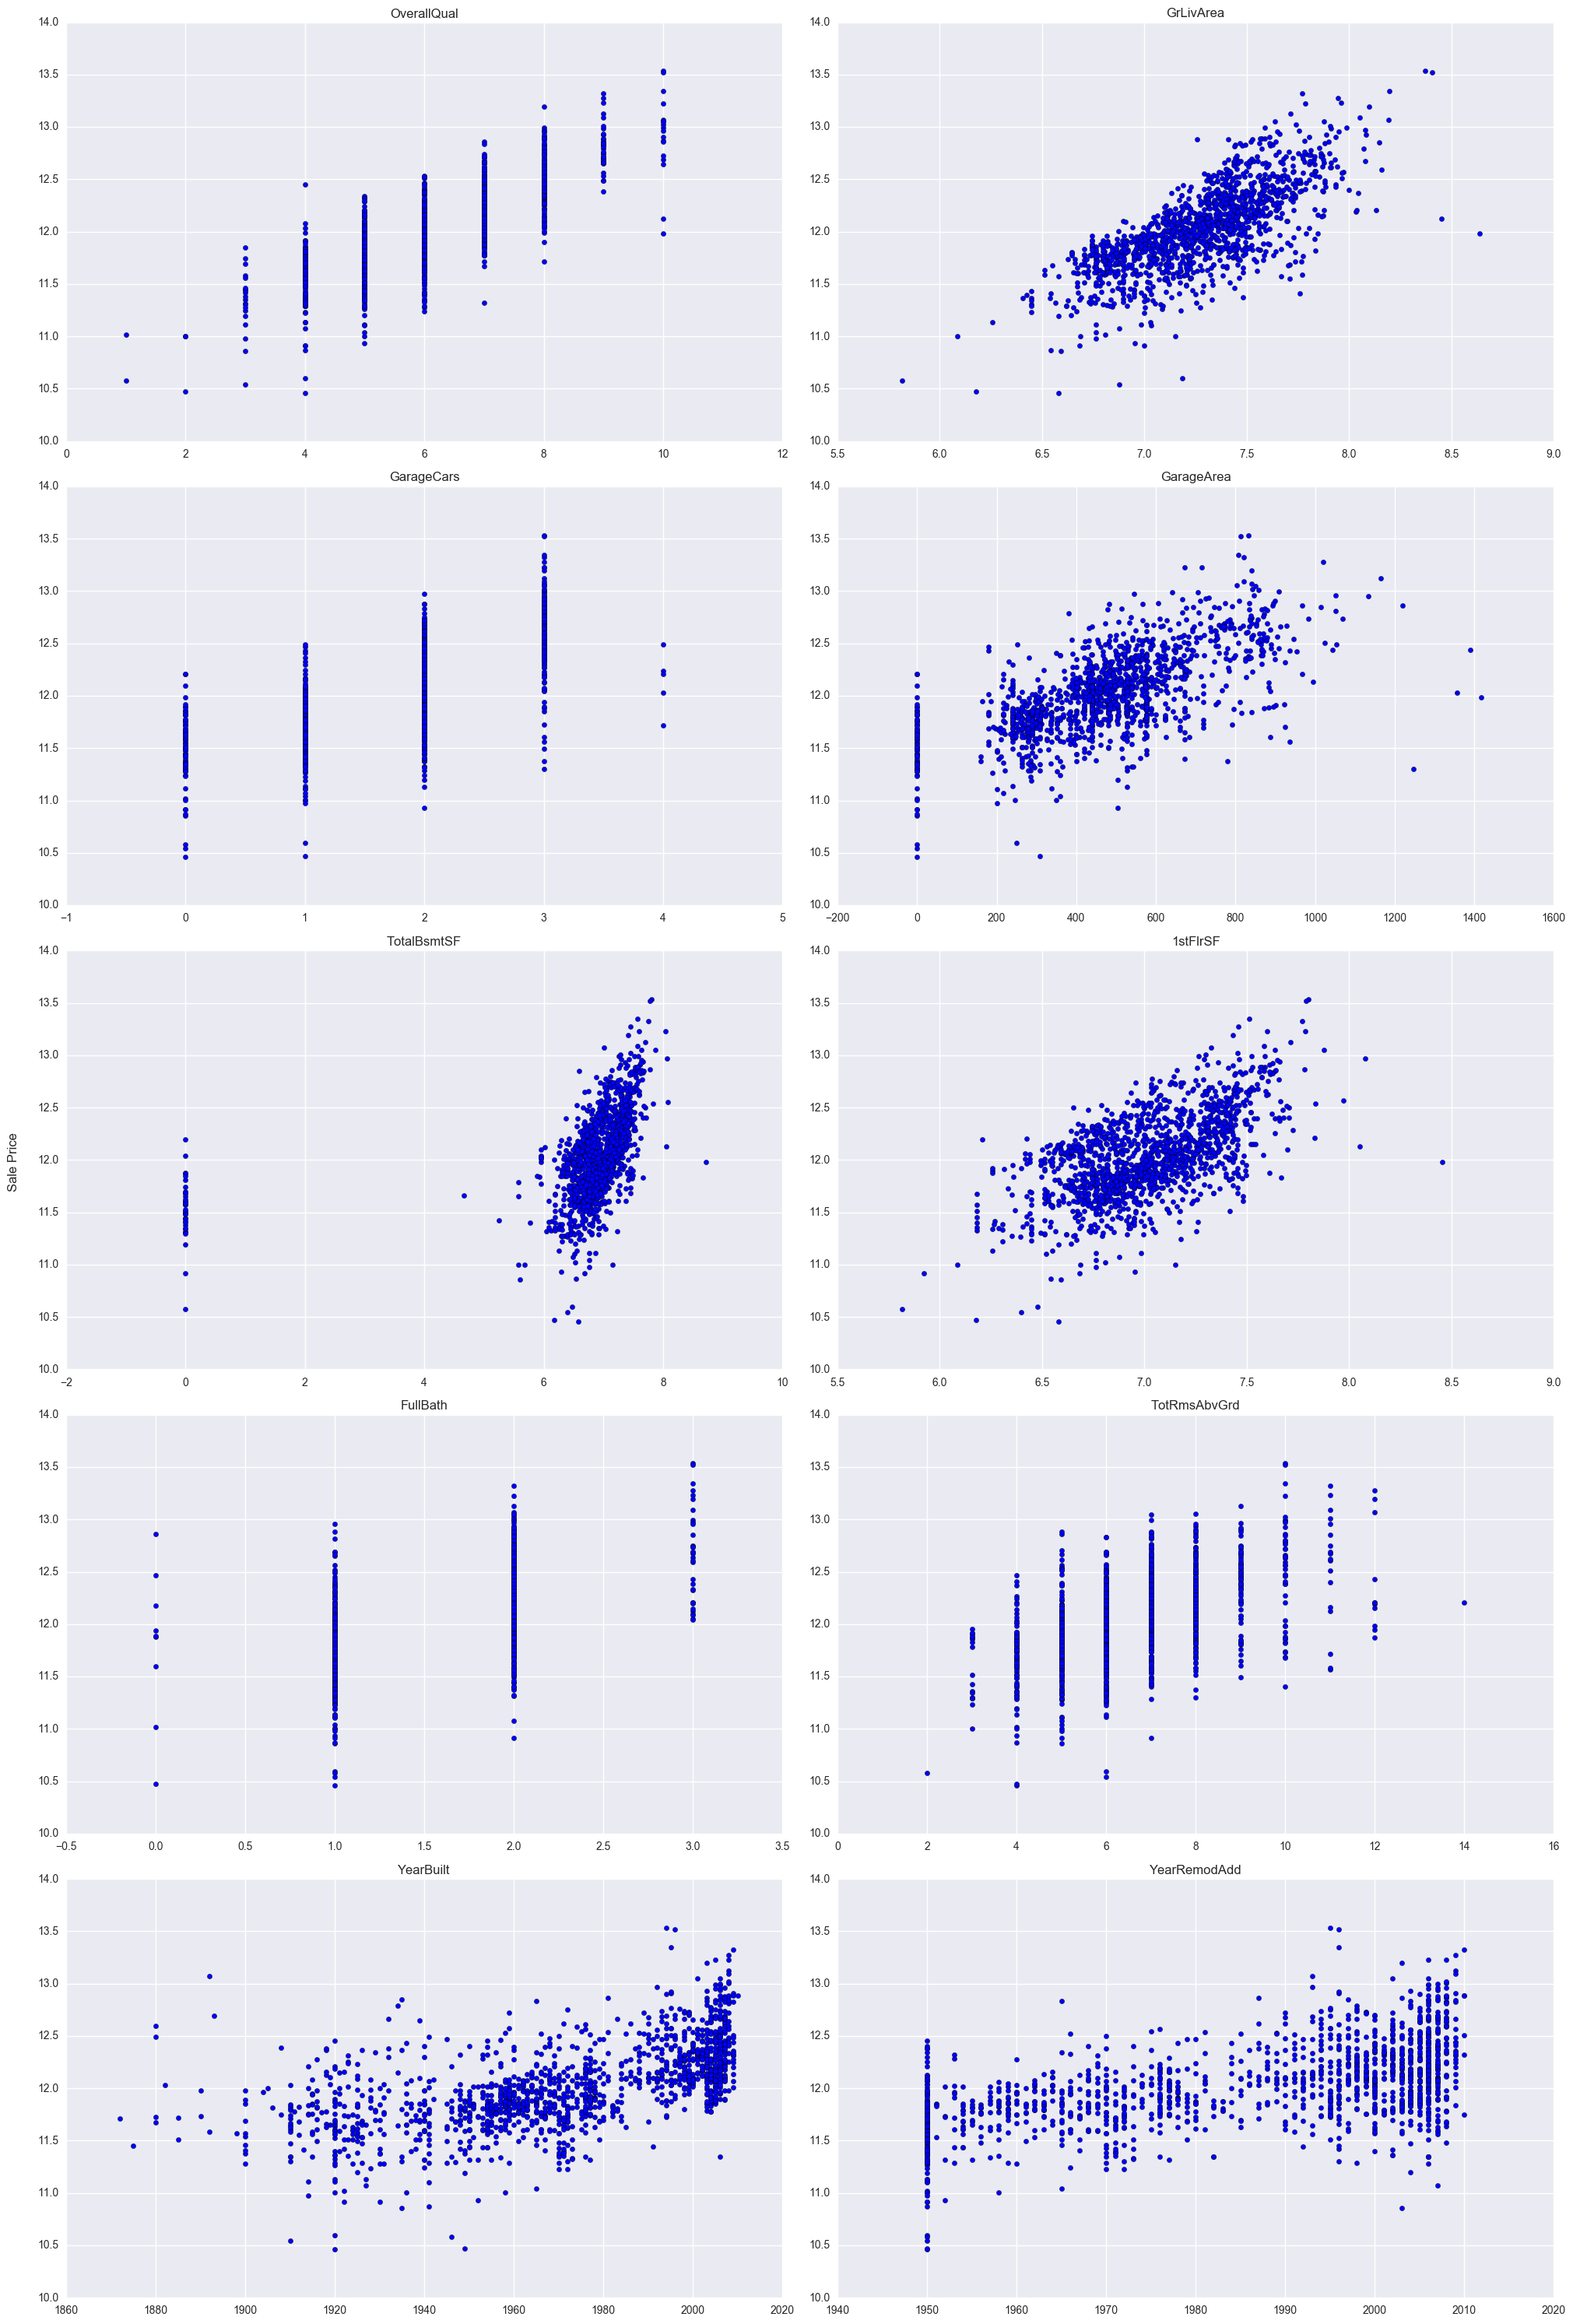

In [26]:
plt.figure(1)
f, axarr = plt.subplots(5, 2, figsize=(20, 30))
price = data.SalePrice.values
axarr[0, 0].scatter(data.OverallQual.values, price)
axarr[0, 0].set_title('OverallQual')
axarr[0, 1].scatter(data.GrLivArea.values, price)
axarr[0, 1].set_title('GrLivArea')
axarr[1, 0].scatter(data.GarageCars.values, price)
axarr[1, 0].set_title('GarageCars')
axarr[1, 1].scatter(data['GarageArea'].values, price)
axarr[1, 1].set_title('GarageArea')
axarr[2, 0].scatter(data['TotalBsmtSF'].values, price)
axarr[2, 0].set_title('TotalBsmtSF')
axarr[2, 1].scatter(data['1stFlrSF'].values, price)
axarr[2, 1].set_title('1stFlrSF')
axarr[3, 0].scatter(data.FullBath.values, price)
axarr[3, 0].set_title('FullBath')
axarr[3, 1].scatter(data.TotRmsAbvGrd.values, price)
axarr[3, 1].set_title('TotRmsAbvGrd')
axarr[4, 0].scatter(data.YearBuilt.values, price)
axarr[4, 0].set_title('YearBuilt')
axarr[4, 1].scatter(data['YearRemodAdd'].values, price)
axarr[4, 1].set_title('YearRemodAdd')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

In [27]:
# separating the target and the predictor variables

target = data['SalePrice']
predictors = data.drop(['SalePrice'], axis=1)

In [28]:
# splitting the data into the training and the testing datasets

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors,target,test_size=0.3,random_state=5)

In [29]:
# functions for calculating the RMSE values for the training and the testing datasets

from sklearn.cross_validation import cross_val_score

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="mean_squared_error", cv = 5)).mean()
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring="mean_squared_error", cv = 5)).mean()
    return(rmse)

In [30]:
# creating a benchmark Linear Regression model 
# variables used are the top 10 most correlated features with the target variable

most_correlated = []
for z in sorted(corr_with_target.items(), key = lambda x: -abs(x[1])):
    a = z
    most_correlated.append(a)
ab = []

for i in range(0,10):
    abc = most_correlated[i][0]
    ab.append(abc)
print "Top ",len(range(0,10)),"most correlated features:",ab

predictors_mc = predictors[ab]
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(predictors_mc,target,test_size=0.3,random_state=5)

Top  10 most correlated features: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt']


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_linear_mc = LinearRegression().fit(X_train_mc,y_train_mc)

pred_lr_train_mc = model_linear_mc.predict(X_train_mc)
print "RMSE for training set, Benchmark Linear Regression = ", np.sqrt(mean_squared_error(pred_lr_train_mc,y_train_mc))

pred_lr_test_mc = model_linear_mc.predict(X_test_mc)
print "RMSE for testing set, Benchmark Linear Regression = ", np.sqrt(mean_squared_error(pred_lr_test_mc,y_test_mc))

RMSE for training set, Benchmark Linear Regression =  0.163773572888
RMSE for testing set, Benchmark Linear Regression =  0.161870232799


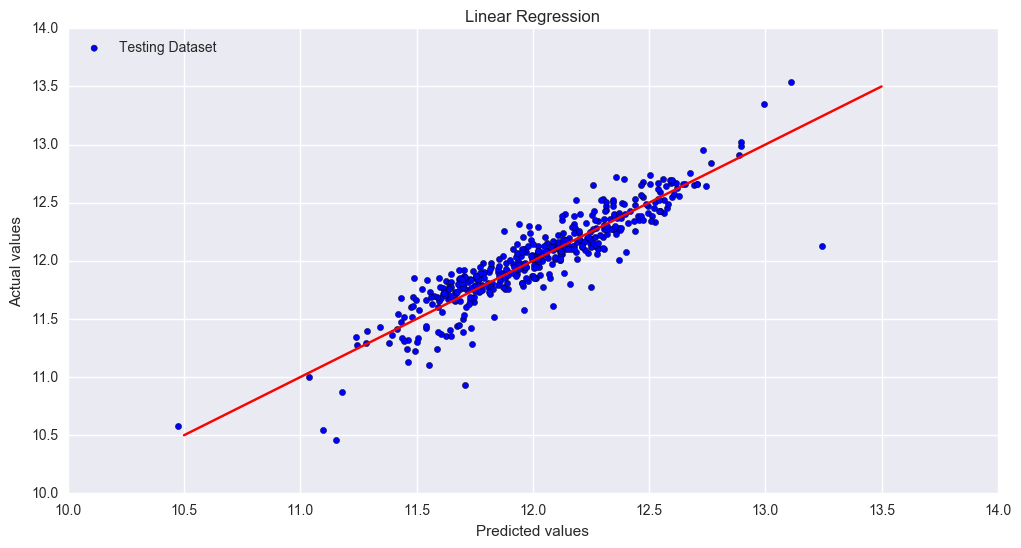

In [32]:
plt.figure(figsize=(12,6))
plt.scatter(pred_lr_test_mc, y_test_mc, label = "Testing Dataset")
plt.title("Linear Regression")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "r")
plt.show()

In [33]:
# Linear Regression model

model_linear = LinearRegression().fit(X_train,y_train)

rmse_linear_train = rmse_cv_train(model_linear)
rmse_linear_test = rmse_cv_test(model_linear)

print "Cross Validated RMSE for Training Set, Linear Regression = ",rmse_linear_train
print "Cross Validated RMSE for Testing Set, Linear Regression = ",rmse_linear_test

pred_lr_train = model_linear.predict(X_train)
pred_lr_test = model_linear.predict(X_test)

Cross Validated RMSE for Training Set, Linear Regression =  0.147581202181
Cross Validated RMSE for Testing Set, Linear Regression =  0.158975018929


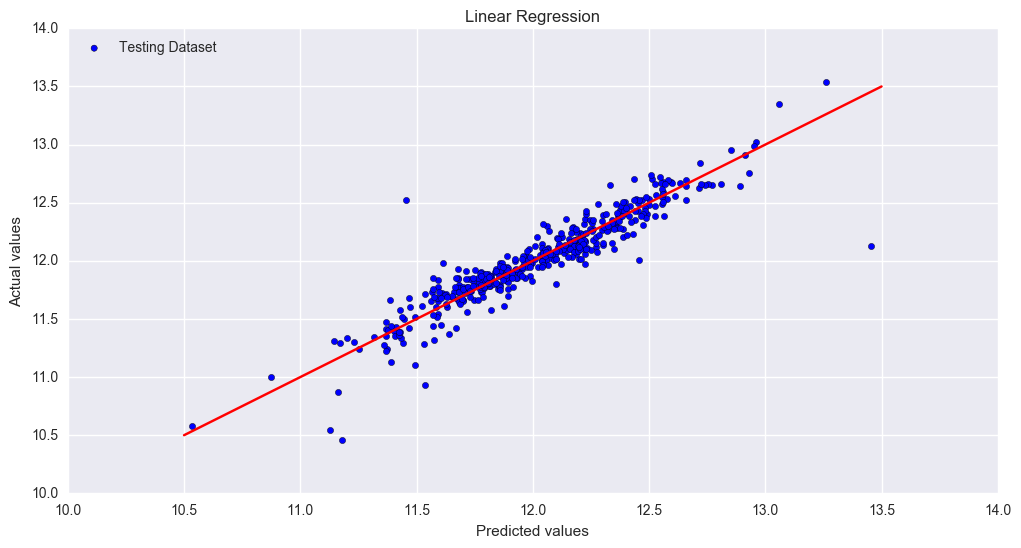

In [34]:
plt.figure(figsize=(12,6))
plt.scatter(pred_lr_test, y_test, label = "Testing Dataset")
plt.title("Linear Regression")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "r")
plt.show()

In [35]:
from sklearn.ensemble import RandomForestRegressor

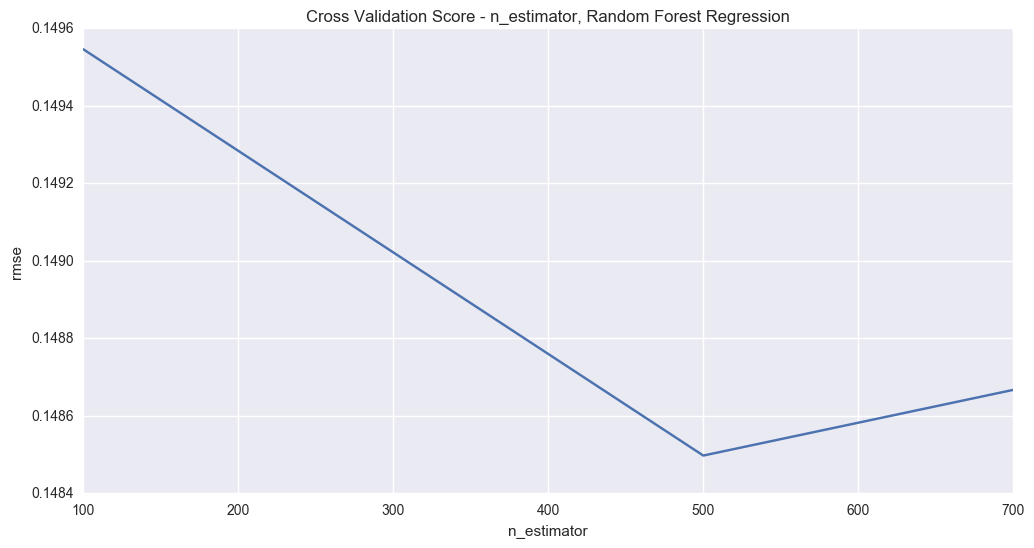

In [36]:
# finding the optimal 'n_estimator' parameter for Random Forest Regressor

cv_rf=[]
rf_n_estimators = [100,500,700]
for n in rf_n_estimators:
    cv_rf_a = rmse_cv_train(RandomForestRegressor(n,random_state=5)).mean()
    cv_rf.append(cv_rf_a)
cv_rf = pd.Series(cv_rf, index = rf_n_estimators)

plt.figure(figsize=(12,6))
cv_rf.plot(title = "Cross Validation Score - n_estimator, Random Forest Regression")
plt.xlabel("n_estimator")
plt.ylabel("rmse")
plt.show()

In [37]:
# Random Forest Regression

model_rf = RandomForestRegressor(n_estimators=500,bootstrap=True,random_state=5).fit(X_train, y_train)

rmse_rf_train = rmse_cv_train(model_rf)
rmse_rf_test = rmse_cv_test(model_rf)

print "Cross Validated RMSE for Training Set, Random Forest Regression = ",rmse_rf_train
print "Cross Validated RMSE for Testing Set, Random Forest Regression = ",rmse_rf_test

pred_rf_train = model_rf.predict(X_train)
pred_rf_test = model_rf.predict(X_test)

Cross Validated RMSE for Training Set, Random Forest Regression =  0.148497477164
Cross Validated RMSE for Testing Set, Random Forest Regression =  0.159155570761


In [38]:
rf_imp = pd.Series(model_rf.feature_importances_, index = X_train.columns)
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_],axis=0)
indices = np.argsort(rf_imp)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], rf_imp[indices[f]]))

Feature ranking:
1. feature 16 (0.596077)
2. feature 45 (0.083532)
3. feature 60 (0.045765)
4. feature 37 (0.034887)
5. feature 33 (0.024017)
6. feature 42 (0.020691)
7. feature 61 (0.018490)
8. feature 3 (0.017243)
9. feature 18 (0.013399)
10. feature 17 (0.010142)
11. feature 59 (0.009459)
12. feature 19 (0.008040)
13. feature 55 (0.007472)
14. feature 1 (0.006029)
15. feature 36 (0.005847)
16. feature 48 (0.005497)
17. feature 43 (0.005408)
18. feature 2 (0.004376)
19. feature 29 (0.004375)
20. feature 11 (0.004270)
21. feature 65 (0.004103)
22. feature 58 (0.003984)
23. feature 75 (0.003611)
24. feature 53 (0.003442)
25. feature 66 (0.003191)
26. feature 27 (0.003134)
27. feature 0 (0.003087)
28. feature 25 (0.003058)
29. feature 40 (0.002989)
30. feature 32 (0.002982)
31. feature 22 (0.002904)
32. feature 52 (0.002494)
33. feature 50 (0.002417)
34. feature 67 (0.002361)
35. feature 57 (0.002284)
36. feature 23 (0.002123)
37. feature 26 (0.001708)
38. feature 78 (0.001623)
39. feat

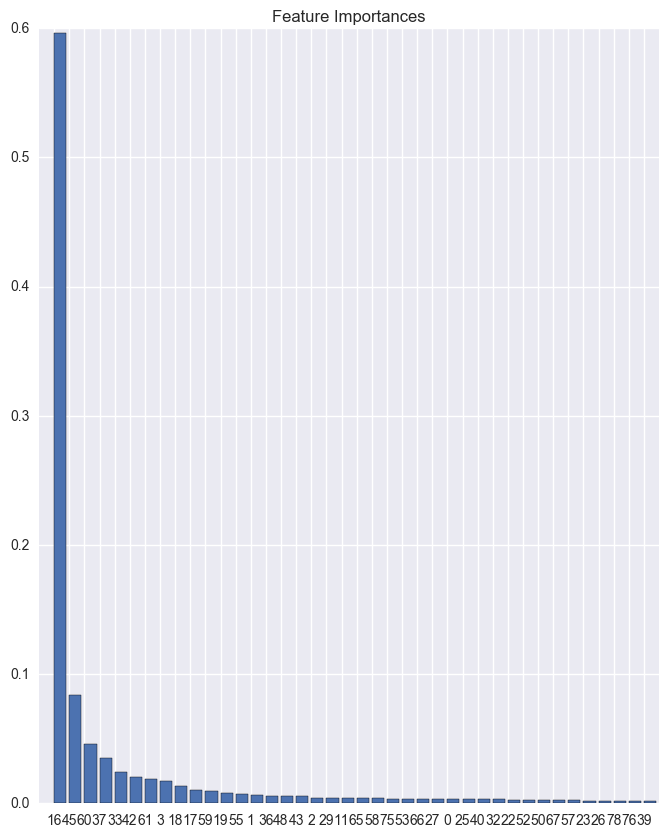

In [39]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
plt.title("Feature Importances")
plt.bar(range(40), rf_imp[indices][0:40])
plt.xlim([-1, 40])
plt.xticks(range(40), indices[0:40])
plt.show()

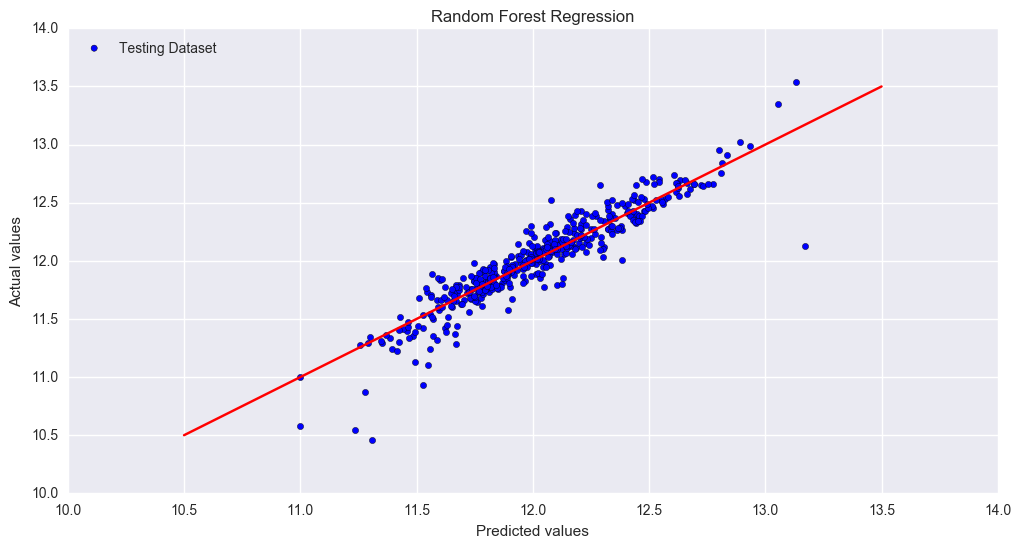

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(pred_rf_test, y_test, label = "Testing Dataset")
plt.title("Random Forest Regression")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "r")
plt.show()

In [41]:
# importing the necessary packages

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV

In [42]:
# Ridge Regression model

alpha_ridge = [1e-25, 1e-10, 1e-5, 0.05, 0.1, 0.5, 1, 5, 10, 25, 50, 100]
model_ridge = RidgeCV(alphas=alpha_ridge, cv=10).fit(X_train,y_train)

print "Optimum Alpha Value for Ridge Regression =", model_ridge.alpha_

rmse_ridge_train = rmse_cv_train(model_ridge)
rmse_ridge_test = rmse_cv_test(model_ridge)

print "Cross Validated RMSE for Training Set, Ridge Regression = ",rmse_ridge_train
print "Cross Validated RMSE for Testing Set, Ridge Regression = ",rmse_ridge_test

pred_ridge_train = model_ridge.predict(X_train)
pred_ridge_test = model_ridge.predict(X_test)

Optimum Alpha Value for Ridge Regression = 10
Cross Validated RMSE for Training Set, Ridge Regression =  0.147688805757
Cross Validated RMSE for Testing Set, Ridge Regression =  0.155925177943


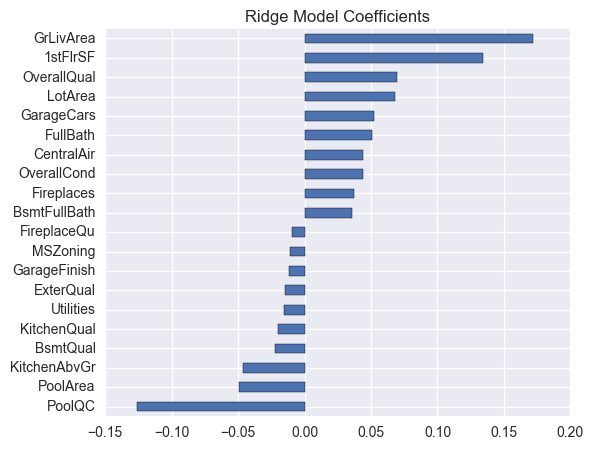

In [43]:
ridge_coef = pd.Series(model_ridge.coef_, index = X_train.columns)
ridge_imp_coef = pd.concat([ridge_coef.sort_values().head(10),ridge_coef.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (6.0, 5.0)
ridge_imp_coef.plot(kind = "barh")
plt.title("Ridge Model Coefficients")
plt.show()

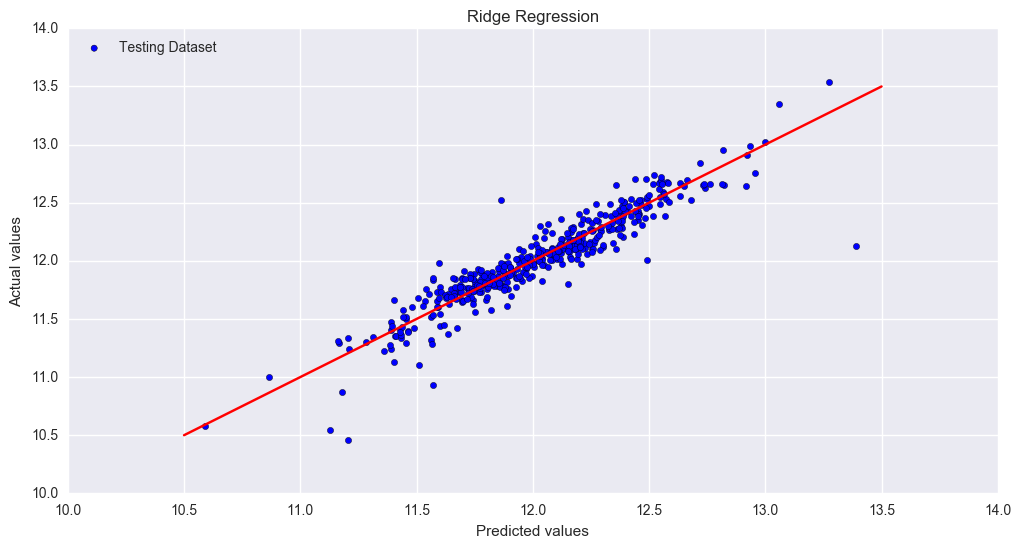

In [44]:
plt.figure(figsize=(12,6))
plt.scatter(pred_ridge_test, y_test, label = "Testing Dataset")
plt.title("Ridge Regression")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "r")
plt.show()

In [45]:
# Lasso Regression model

alpha_lasso = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
model_lasso = LassoCV(alphas=alpha_lasso, cv=10).fit(X_train,y_train)

print "Optimum Alpha Value for Lasso Regression =", model_lasso.alpha_

rmse_lasso_train = rmse_cv_train(model_lasso)
rmse_lasso_test = rmse_cv_test(model_lasso)

print "Cross Validated RMSE for Training Set, Lasso Regression = ",rmse_lasso_train
print "Cross Validated RMSE for Testing Set, Lasso Regression = ",rmse_lasso_test

pred_lasso_train = model_lasso.predict(X_train)
pred_lasso_test = model_lasso.predict(X_test)

Optimum Alpha Value for Lasso Regression = 0.001
Cross Validated RMSE for Training Set, Lasso Regression =  0.145180361429
Cross Validated RMSE for Testing Set, Lasso Regression =  0.157471067469


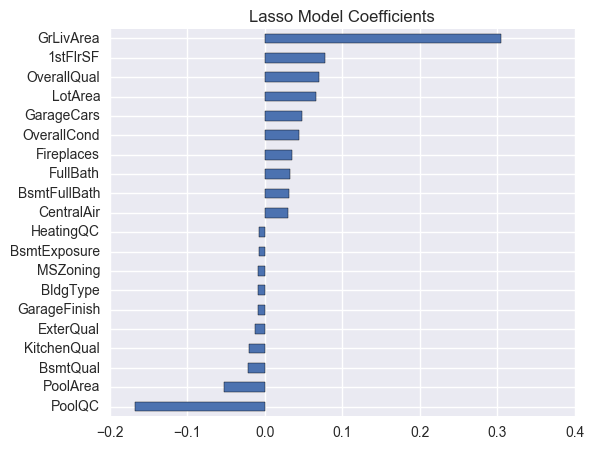

In [46]:
lasso_coef = pd.Series(model_lasso.coef_, index = X_train.columns)
lasso_imp_coef = pd.concat([lasso_coef.sort_values().head(10),lasso_coef.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (6.0, 5.0)
lasso_imp_coef.plot(kind = "barh")
plt.title("Lasso Model Coefficients")
plt.show()

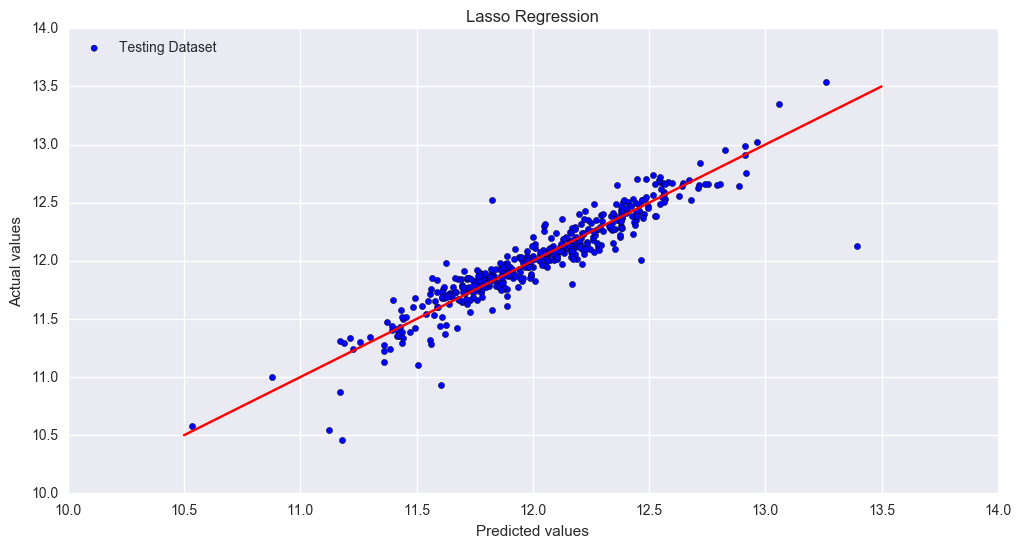

In [47]:
plt.figure(figsize=(12,6))
plt.scatter(pred_lasso_test, y_test, label = "Testing Dataset")
plt.title("Lasso Regression")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "r")
plt.show()

In [48]:
# Elastic Net Regression Model

alpha_en = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20, 25, 50, 100]
model_en = ElasticNetCV(l1_ratio= [0.1,0.5,0.7,0.9, 0.95, 0.99,1], alphas=alpha_en).fit(X_train,y_train)

print "Optimum Alpha Value for ElasticNet Regression =", model_en.alpha_
print "Optimum L1 Value for ElasticNet Regression =", model_en.l1_ratio_

rmse_en_train = rmse_cv_train(model_en)
rmse_en_test = rmse_cv_test(model_en)

print "Cross Validated RMSE for Training Set, ElasticNet Regression = ",rmse_en_train
print "Cross Validated RMSE for Testing Set, ElasticNet Regression = ",rmse_en_test

pred_en_train = model_en.predict(X_train)
pred_en_test = model_en.predict(X_test)

Optimum Alpha Value for ElasticNet Regression = 0.001
Optimum L1 Value for ElasticNet Regression = 1.0
Cross Validated RMSE for Training Set, ElasticNet Regression =  0.142466482744
Cross Validated RMSE for Testing Set, ElasticNet Regression =  0.150825428273


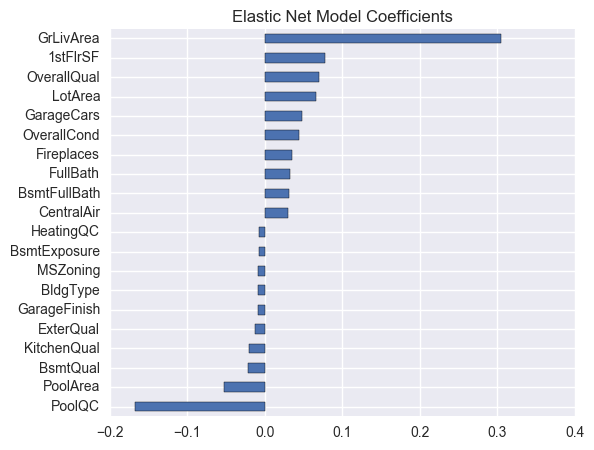

In [49]:
en_coef = pd.Series(model_en.coef_, index = X_train.columns)
en_imp_coef = pd.concat([en_coef.sort_values().head(10),en_coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (6.0, 5.0)
en_imp_coef.plot(kind = "barh")
plt.title("Elastic Net Model Coefficients")
plt.show()

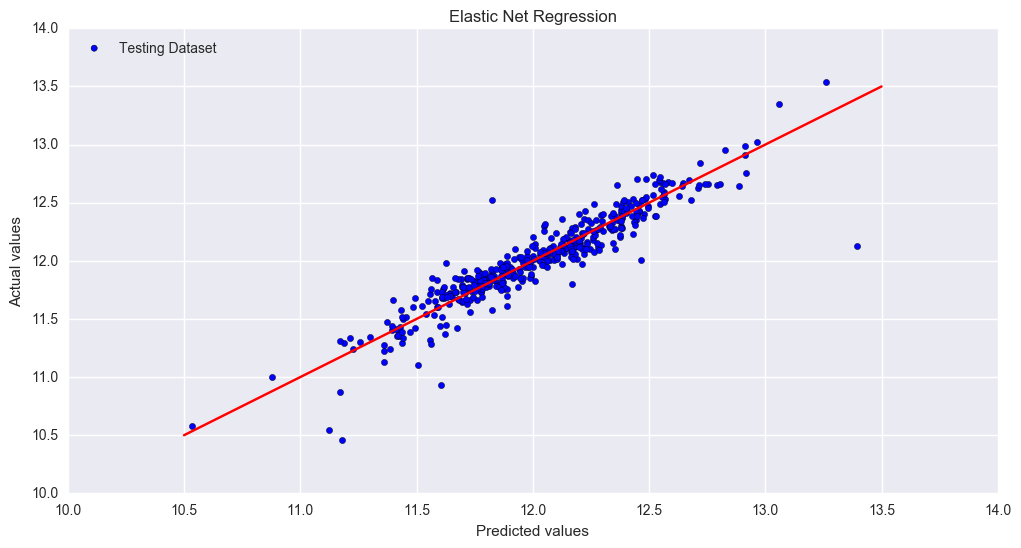

In [50]:
plt.figure(figsize=(12,6))
plt.scatter(pred_en_test, y_test, label = "Testing Dataset")
plt.title("Elastic Net Regression")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "r")
plt.show()

In [51]:
# Principal Component Analysis (PCA)
# getting the total variances explained by the principal components

from sklearn.decomposition import PCA
pca = PCA(n_components=79).fit(data)
pca.explained_variance_ratio_.cumsum()

array([ 0.96514145,  0.98892216,  0.99371967,  0.99680157,  0.99754124,
        0.99795155,  0.99825543,  0.9984675 ,  0.99862344,  0.99874908,
        0.99887412,  0.99896655,  0.99904507,  0.99911009,  0.99917324,
        0.99922807,  0.99928151,  0.99933242,  0.99938203,  0.99942408,
        0.99946301,  0.9995004 ,  0.99953588,  0.99957025,  0.99960277,
        0.99963331,  0.99966123,  0.99968615,  0.9997079 ,  0.99972934,
        0.99974837,  0.99976637,  0.99978293,  0.9997985 ,  0.9998131 ,
        0.99982662,  0.99983847,  0.99984962,  0.99986026,  0.99987029,
        0.99988005,  0.99988897,  0.99989731,  0.99990475,  0.99991204,
        0.99991917,  0.99992599,  0.99993236,  0.99993844,  0.99994375,
        0.99994864,  0.9999535 ,  0.99995807,  0.99996219,  0.99996592,
        0.99996953,  0.99997302,  0.9999764 ,  0.9999795 ,  0.99998238,
        0.99998509,  0.99998747,  0.99998948,  0.99999117,  0.99999278,
        0.99999408,  0.99999532,  0.99999635,  0.99999716,  0.99

In [52]:
# functions to calculate the RMSE for the models trained on the PCA reduced data

def rmse_pca_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, pca_x_train, pca_y_train, scoring="mean_squared_error", cv = 10)).mean()
    return(rmse)

def rmse_pca_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, pca_x_test, pca_y_test, scoring="mean_squared_error", cv = 10)).mean()
    return(rmse)

In [53]:
# Linear Regression on PCA reduced data

pca_final = PCA(n_components = 5).fit_transform(data.iloc[:,1:79])
pca_data = pd.DataFrame(pca_final, columns = ['1','2','3','4','5'])
pca_target = data['SalePrice']

pca_x_train,pca_x_test,pca_y_train,pca_y_test=train_test_split(pca_data,pca_target,test_size=0.3,random_state=5)

lr_pca = LinearRegression().fit(pca_x_train,pca_y_train)

rmse_lr_pca_train = rmse_pca_cv_train(lr_pca)
rmse_lr_pca_test = rmse_pca_cv_test(lr_pca)

print "Cross Validated RMSE for Training Set, PCA Reduced Linear Regression = ",rmse_lr_pca_train
print "Cross Validated RMSE for Testing Set, PCA Reduced Linear Regression = ",rmse_lr_pca_test

pred_lr_pca_train = lr_pca.predict(pca_x_train)
pred_lr_pca_test = lr_pca.predict(pca_x_test)

Cross Validated RMSE for Training Set, PCA Reduced Linear Regression =  0.262864665621
Cross Validated RMSE for Testing Set, PCA Reduced Linear Regression =  0.251745177607


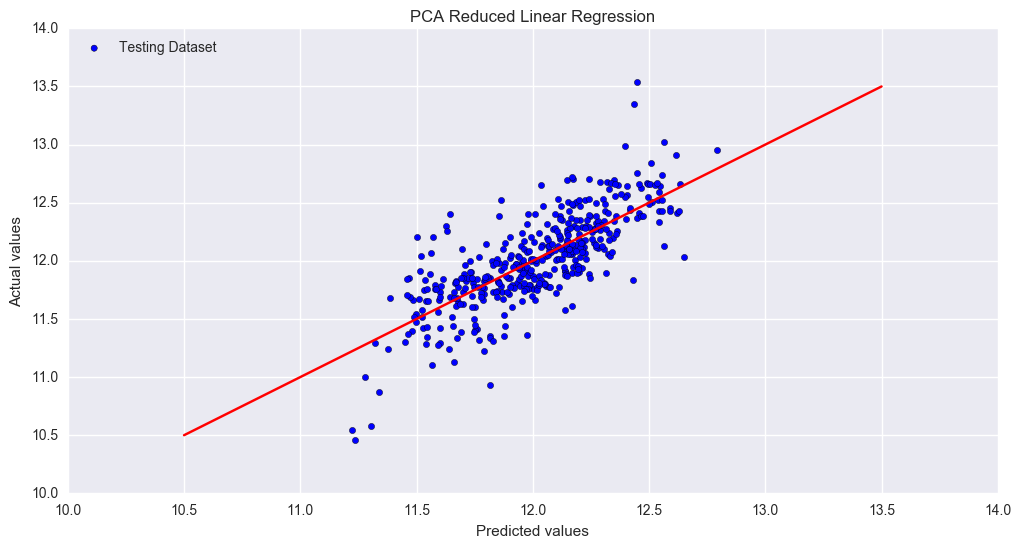

In [54]:
plt.figure(figsize=(12,6))
plt.scatter(pred_lr_pca_test, y_test, label = "Testing Dataset")
plt.title("PCA Reduced Linear Regression")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "r")
plt.show()

In [55]:
# Random Forest on PCA reduced data

from sklearn.ensemble import RandomForestRegressor
rf_pca = RandomForestRegressor(n_estimators=500,bootstrap=True,random_state=5).fit(pca_x_train,pca_y_train)

rmse_rf_pca_train = rmse_pca_cv_train(rf_pca)
rmse_rf_pca_test = rmse_pca_cv_test(rf_pca)

print "Cross Validated RMSE for Training Set, PCA Reduced Random Forest Regression = ",rmse_rf_pca_train
print "Cross Validated RMSE for Testing Set, PCA Reduced Random Forest Regression = ",rmse_rf_pca_test

pred_rf_pca_train = rf_pca.predict(pca_x_train)
pred_rf_pca_test = rf_pca.predict(pca_x_test)

Cross Validated RMSE for Training Set, PCA Reduced Random Forest Regression =  0.244844393735
Cross Validated RMSE for Testing Set, PCA Reduced Random Forest Regression =  0.241826268756


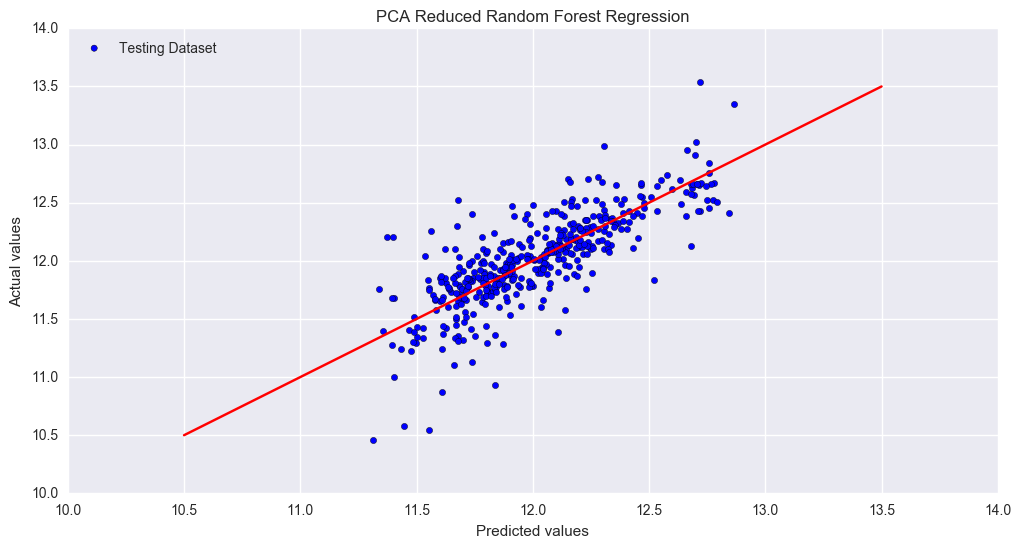

In [56]:
plt.figure(figsize=(12,6))
plt.scatter(pred_rf_pca_test, y_test, label = "Testing Dataset")
plt.title("PCA Reduced Random Forest Regression")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "r")
plt.show()

In [57]:
rmse_train = pd.DataFrame({'Model':['Linear','RF','Ridge','Lasso','Elastic Net','PCA-Linear',
                           'PCA-RF'],'RMSE':[rmse_linear_train,rmse_rf_train,rmse_ridge_train,
                            rmse_lasso_train,rmse_en_train,rmse_lr_pca_train,rmse_rf_pca_train]})

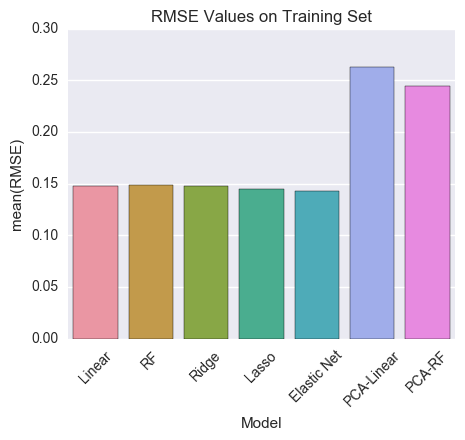

In [58]:
plt.figure(figsize = (5, 4))
sns.barplot(x = 'Model',y = 'RMSE', data = rmse_train)
xt = plt.xticks(rotation=45)
plt.title("RMSE Values on Training Set")
plt.show()

In [59]:
rmse_test = pd.DataFrame({'Model':['Linear','RF','Ridge','Lasso','Elastic Net','PCA-Linear',
                           'PCA-RF'],'RMSE':[rmse_linear_test,rmse_rf_test,rmse_ridge_test,
                            rmse_lasso_test,rmse_en_test,rmse_lr_pca_test,rmse_rf_pca_test]})

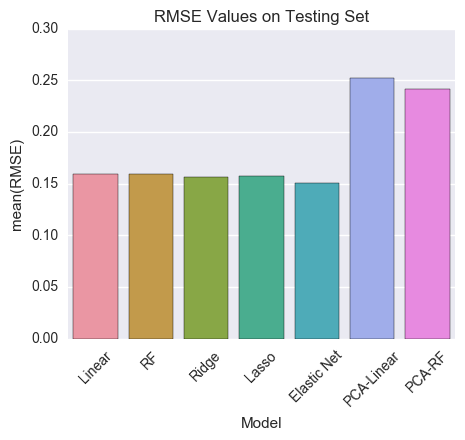

In [60]:
plt.figure(figsize = (5, 4))
sns.barplot(x = 'Model',y = 'RMSE', data = rmse_test)
xt = plt.xticks(rotation=45)
plt.title("RMSE Values on Testing Set")
plt.show()